In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
Heart_data = pd.read_excel('C:/Users/karan/Desktop/Projects/Datas/Heartattack_prediction_data.xlsx')

In [3]:
Heart_data.head()

,Sex,Age,Heart Rate,Glucose,BMI,Smoker,Ciggarates(Per Day),Hypertension,Systolic BP,Diastolic BP,ON BP Medication,Previous Stroke,Diabetic,RiskOfCHD
0,1,39,80.0,77.0,26.97,0,0.0,0,106.0,70.0,0.0,0,0,0
1,0,46,95.0,76.0,28.73,0,0.0,0,121.0,81.0,0.0,0,0,0
2,1,48,75.0,70.0,25.34,1,20.0,0,127.5,80.0,0.0,0,0,0
3,0,61,65.0,103.0,28.58,1,30.0,1,150.0,95.0,0.0,0,0,1
4,0,46,85.0,85.0,23.10,1,23.0,0,130.0,84.0,0.0,0,0,0


In [4]:
Heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sex                  4312 non-null   int64  
 1   Age                  4312 non-null   int64  
 2   Heart Rate           4311 non-null   float64
 3   Glucose              4112 non-null   float64
 4   BMI                  4293 non-null   float64
 5   Smoker               4312 non-null   int64  
 6   Ciggarates(Per Day)  4283 non-null   float64
 7   Hypertension         4312 non-null   int64  
 8   Systolic  BP         4312 non-null   float64
 9   Diastolic BP         4312 non-null   float64
 10  ON BP Medication     4260 non-null   float64
 11  Previous Stroke      4312 non-null   int64  
 12  Diabetic             4312 non-null   int64  
 13  RiskOfCHD            4312 non-null   int64  
dtypes: float64(7), int64(7)
memory usage: 471.8 KB


In [5]:
Heart_data.isnull().sum()

Sex                      0
Age                      0
Heart Rate               1
Glucose                200
BMI                     19
Smoker                   0
Ciggarates(Per Day)     29
Hypertension             0
Systolic  BP             0
Diastolic BP             0
ON BP Medication        52
Previous Stroke          0
Diabetic                 0
RiskOfCHD                0
dtype: int64

In [6]:
Heart_data['RiskOfCHD'].value_counts()

RiskOfCHD
0    3654
1     658
Name: count, dtype: int64

In [7]:
print(Heart_data.duplicated().sum())

68


In [8]:
Heart_data = Heart_data.drop_duplicates()

In [9]:
Heart_data.shape

(4244, 14)

In [10]:
Heart_data['Heart Rate'] = Heart_data['Heart Rate'].fillna(Heart_data['Heart Rate'].mean().round())

In [11]:
Heart_data['Glucose'] = Heart_data['Glucose'].fillna(Heart_data['Glucose'].mean())

In [12]:
Heart_data['BMI'] = Heart_data['BMI'].fillna(Heart_data['BMI'].mean())

In [13]:
Heart_data['Ciggarates(Per Day)'] = Heart_data['Ciggarates(Per Day)'].fillna(Heart_data['Ciggarates(Per Day)'].mean().round())

In [14]:
Heart_data['ON BP Medication'] = Heart_data['ON BP Medication'].fillna(Heart_data['ON BP Medication'].mode()[0])

In [15]:
Heart_data.isnull().sum()

Sex                    0
Age                    0
Heart Rate             0
Glucose                0
BMI                    0
Smoker                 0
Ciggarates(Per Day)    0
Hypertension           0
Systolic  BP           0
Diastolic BP           0
ON BP Medication       0
Previous Stroke        0
Diabetic               0
RiskOfCHD              0
dtype: int64

In [16]:
cols = Heart_data.columns

Sex


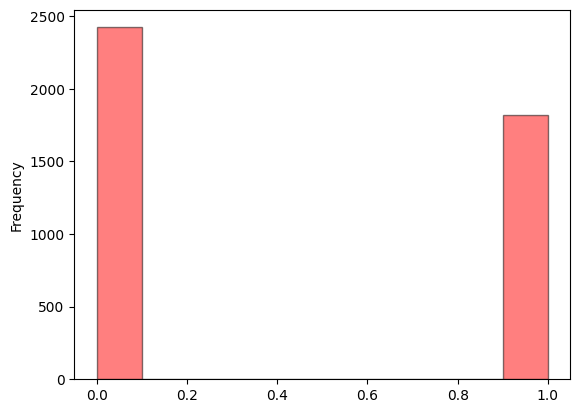

Age


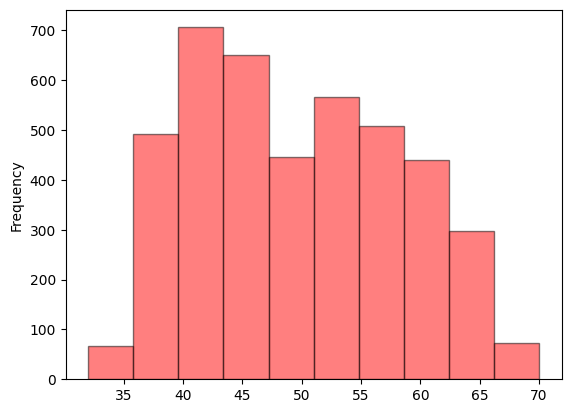

Heart Rate


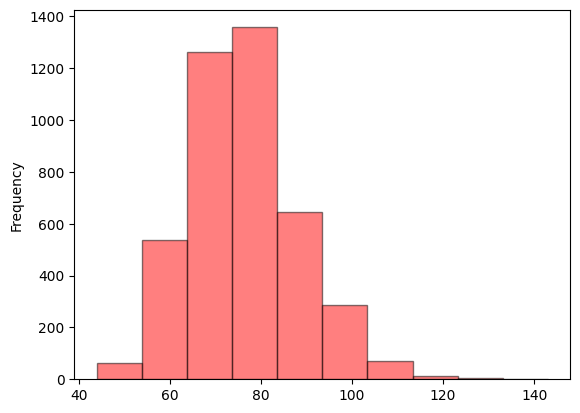

Glucose


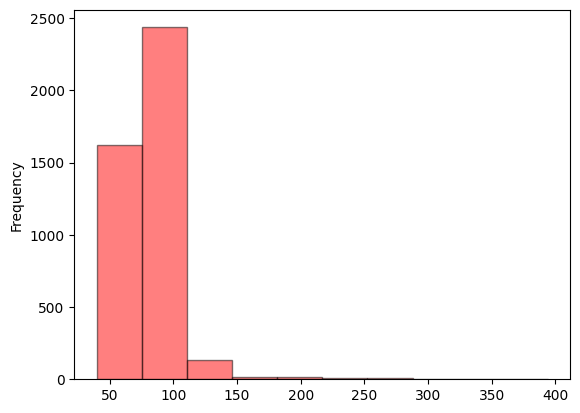

BMI


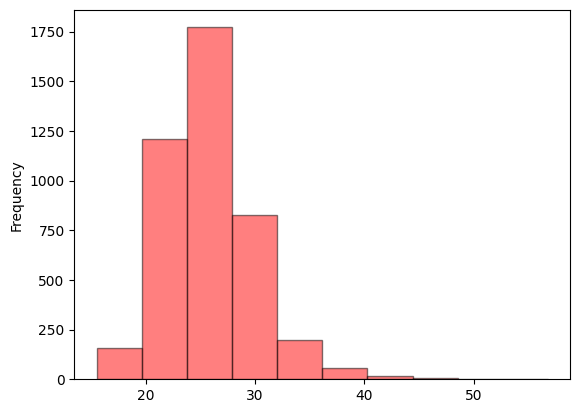

Smoker


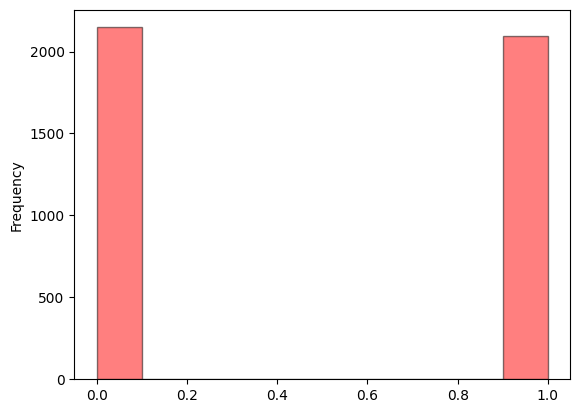

Ciggarates(Per Day)


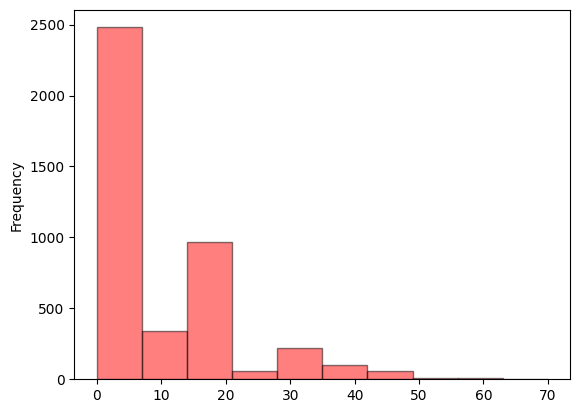

Hypertension


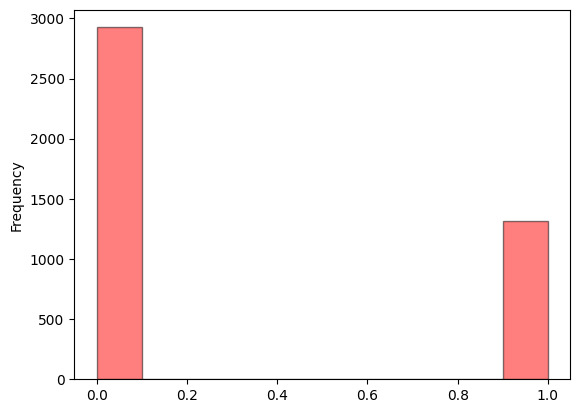

Systolic  BP


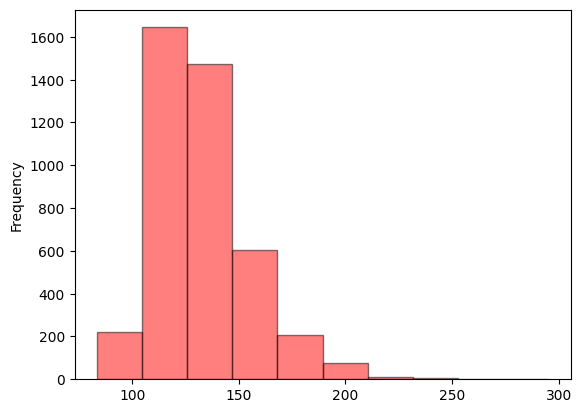

Diastolic BP


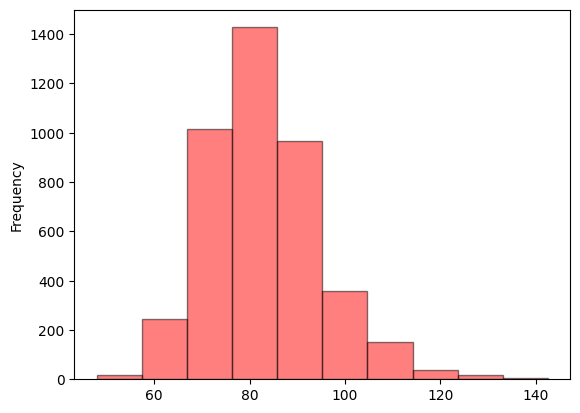

ON BP Medication


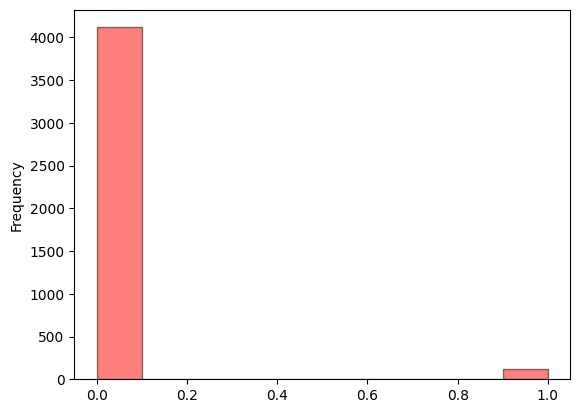

Previous Stroke


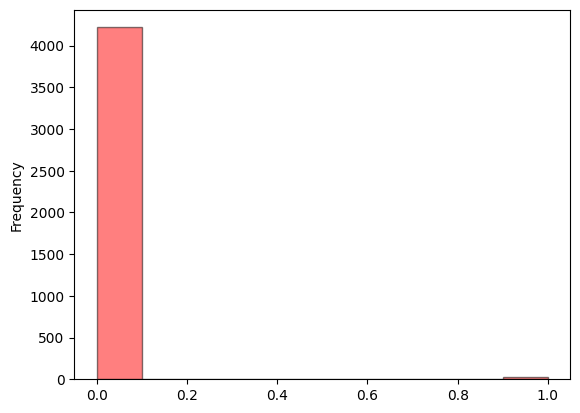

Diabetic


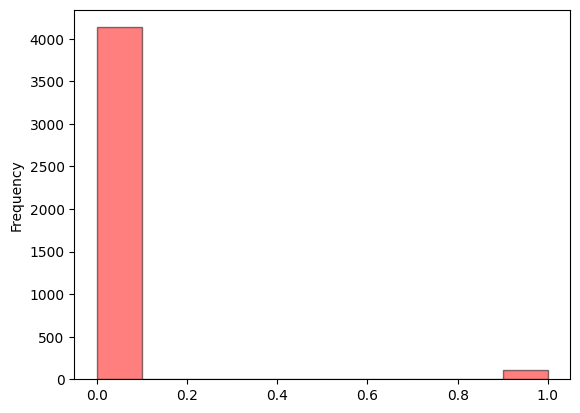

RiskOfCHD


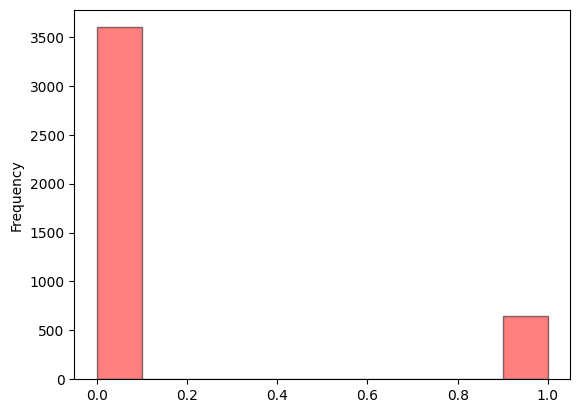

In [17]:
for col in cols:
    print(col)
    plt.figure()
    plt.subplot(1,1,1)
    Heart_data[col].hist(bins = 10, alpha = 0.5, color = 'red', edgecolor = 'black', grid = False)
    plt.ylabel('Frequency')
    plt.show()

In [18]:
corr = Heart_data[cols].corr()

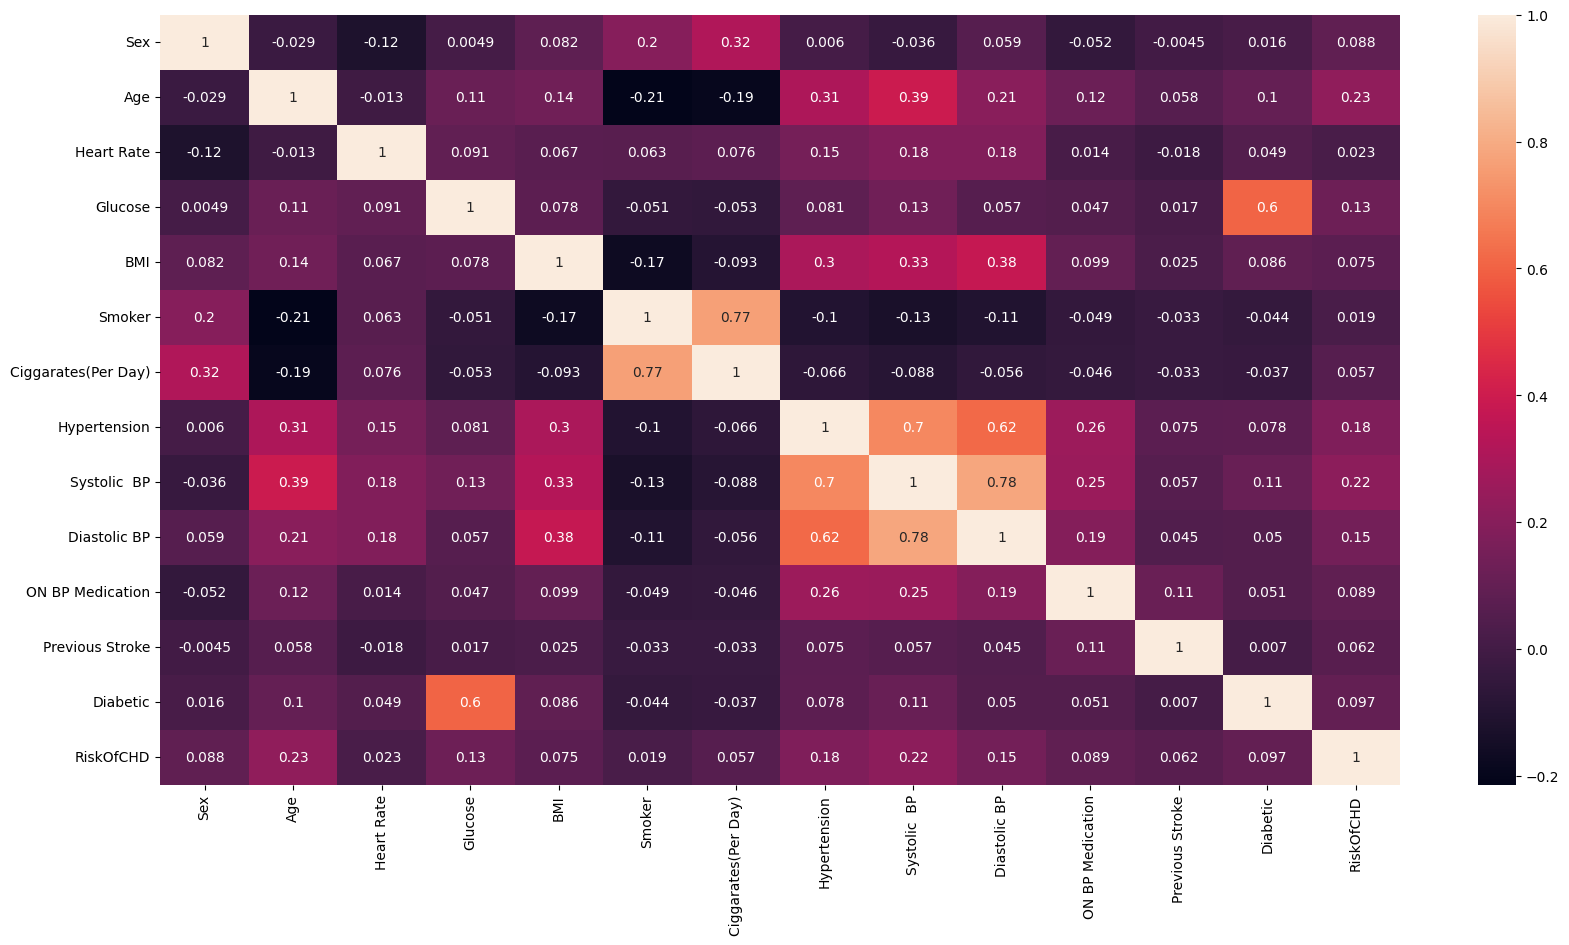

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot = True)
plt.show()

In [20]:
x = Heart_data.drop(columns = ['Heart Rate'])
y = Heart_data['Heart Rate']

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [22]:
est = sm.OLS(y, X_scaled).fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:             Heart Rate   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):             -0.001
Method:                 Least Squares   F-statistic:                             0.6663
Date:                Wed, 24 Jul 2024   Prob (F-statistic):                       0.798
Time:                        17:52:24   Log-Likelihood:                         -24443.
No. Observations:                4244   AIC:                                  4.891e+04
Df Residuals:                    4231   BIC:                                  4.899e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = model.predict(X_test)

In [25]:
r2 = r2_score(y_test, y_pred)
mse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R2 score: {r2}")
print(f"Mean Squared Error: {mse}")

R2 score: 0.08565232722400384
Mean Squared Error: 11.964547220014397


In [26]:
coefficients = model.coef_
intercept = model.intercept_

print(f"Coefficients", coefficients)
print(f"Intercepts", intercept)

Coefficients [-1.87099068 -0.78264645  1.06381361  0.13231688  0.34664793  1.33599181
  0.67336621  1.13742641  1.23734402 -0.5996799  -0.27728864 -0.21069088
 -0.14296309]
Intercepts 75.79311322076875


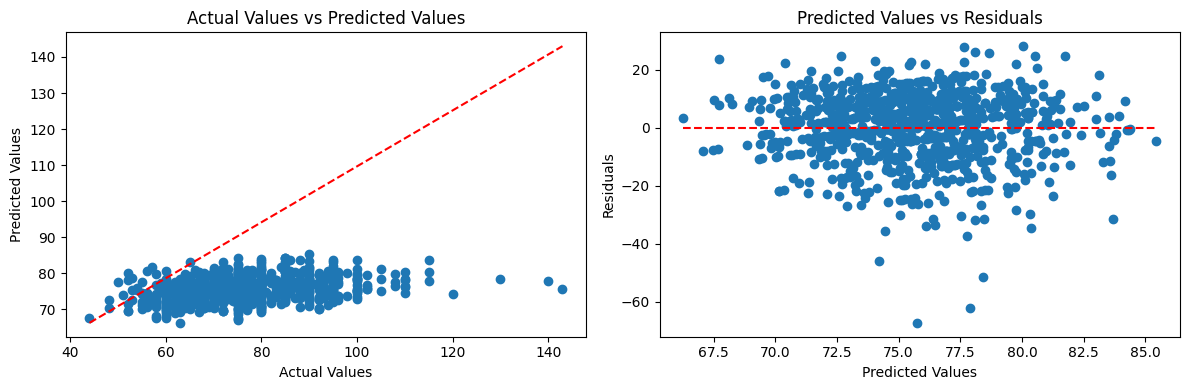

In [27]:
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual Values vs Predicted Values')


plt.subplot(1,2,2)
residuals = y_pred-y_test
plt.scatter(y_pred, residuals)
plt.hlines(y = 0, xmin = min(y_pred), xmax = max(y_pred), colors = 'r', linestyle = '--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Predicted Values vs Residuals')
plt.tight_layout()
plt.show()

In [28]:
new = [[1, 45, 77.0, 29.97, 0, 0.0, 0, 106.0, 70.0, 0.0, 0, 0, 1]]
new_scaled = scaler.transform(new)

c:\Users\karan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [29]:
y_pred_new = model.predict(new_scaled)

In [30]:
print((y_pred_new[0]))

69.26761816229805
